In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


basic eda

<Axes: >

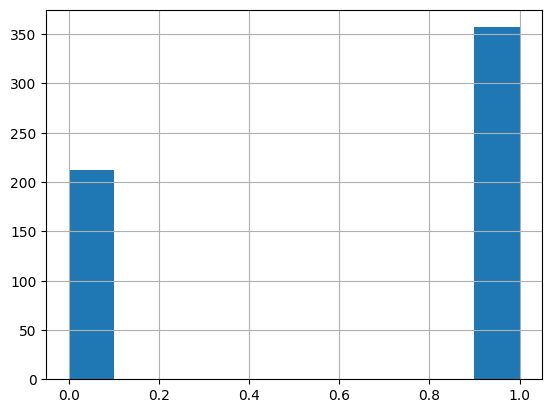

In [5]:
df['diagnosis'].hist()

<Axes: >

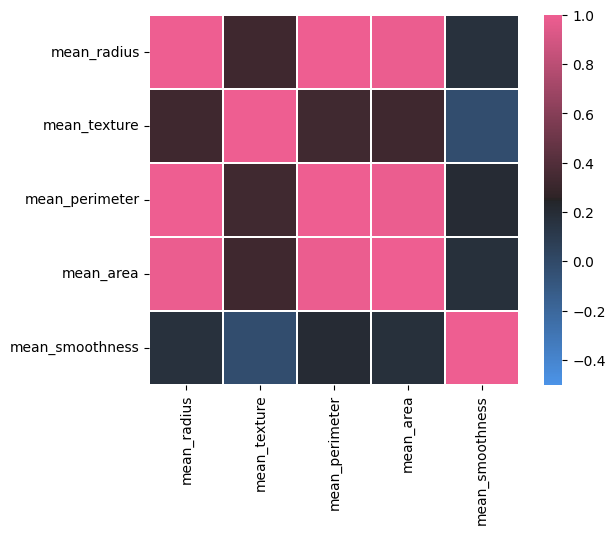

In [7]:
corr=df.iloc[:,:-1].corr(method='pearson')
cmap=sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True) #list of colors
sns.heatmap(corr,vmax=1,vmin=-.5,cmap=cmap,square=True,linewidths=.2)

In [8]:
df=df[['mean_radius','mean_texture','mean_smoothness','diagnosis']]
df.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


<Axes: xlabel='mean_smoothness', ylabel='Count'>

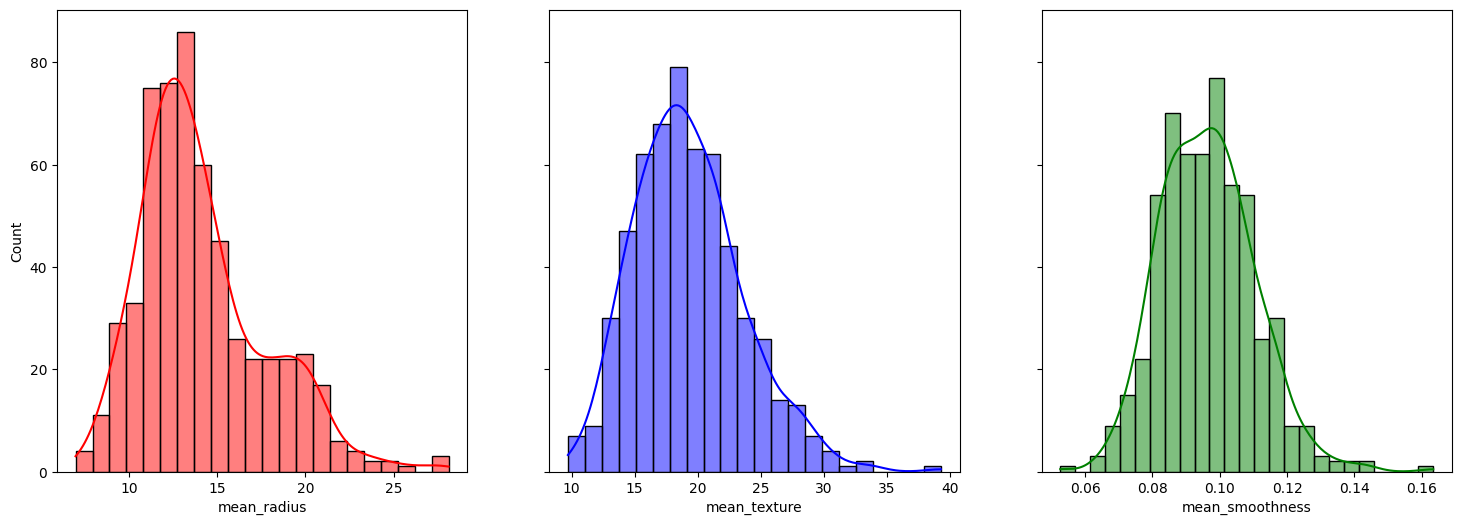

In [9]:
fig,axes=plt.subplots(1,3,figsize=(18,6) ,sharey=True)
sns.histplot(df,ax=axes[0],x='mean_radius',kde=True,color='r')
sns.histplot(df,ax=axes[1],x='mean_texture',kde=True,color='b')
sns.histplot(df,ax=axes[2],x='mean_smoothness',kde=True,color='g')

In [28]:
def calculate_prior(df,Y):
    classes = sorted(list(df[Y].unique()))
    prior=[]
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
        # WE ARE DIVIDING NO OF SAMPLES WHERE Y==I BY TOTAL SAMPLES Y/TOTAL
    return prior

APROACH 1

In [29]:
def calculate_likelihood_gaussian(df,feat_name,feat_val,Y,label):
    feat=list(df.columns) #extract feat names
    df=df[df[Y]==label] #cal y value at given labels conditional probability
    #fit a nd to our feature
    mean,std=df[feat_name].mean(),df[feat_name].std()
    #pdf
    p_x_given_y=(1/(np.sqrt(2*np.pi)*std))*np.exp(-((feat_val*mean)**2/(2*std**2)))
    return p_x_given_y

In [30]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [32]:
def naive_bayes_gaussian(df,X,Y):
    features=list(df.columns)[:-1]
    #calculate prior
    prior=calculate_prior(df,Y)
    Y_pred=[]
    
    for x in X:
        #CALCULATE LIKELIHOOD
        labels=sorted(list(df[Y].unique()))
        likelihood=[1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j]*=calculate_likelihood_gaussian(df,features[i],x[i],Y,labels[j])
        #calculate posterior probab for numerator only   
        post_prob=[1]*len(labels)
        for j in range(len(labels)):
            post_prob[j]=likelihood[j]*prior[j]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)   

In [33]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=41)
X_test=test.iloc[:,:-1].values
Y_test=test.iloc[:,-1].values
Y_pred=naive_bayes_gaussian(train,X=X_test,Y='diagnosis')

from sklearn.metrics import confusion_matrix,f1_score
print(confusion_matrix(Y_test,Y_pred))
print(f1_score(Y_test,Y_pred))


[[36  4]
 [ 0 74]]
0.9736842105263158
